In [1]:
import pandas as pd
import numpy as np
import arviz as az
import pymc3 as pm
import scipy.stats as st
import seaborn as sns

In [2]:
# (hits, at_bats)
player = np.array([10, 100])

In [3]:
with pm.Model() as m:
    
    hit_rate = pm.Beta('hit_rate', alpha = 1, beta = 1)
    hits = pm.Binomial('hits', n=player[1], p = hit_rate, observed = player[0])

In [4]:
# check priors
with m:
    prior = pm.sample_prior_predictive(samples=1000)

C:\anaconda\envs\py37\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\anaconda\envs\py37\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\anaconda\envs\py37\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


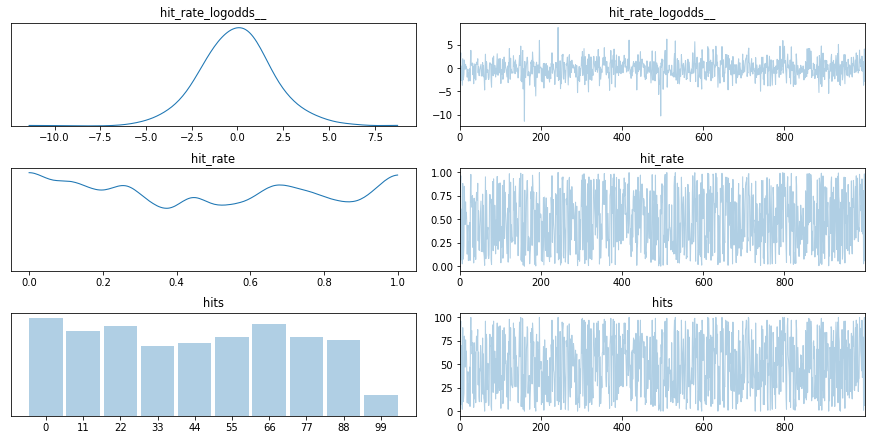

In [5]:
# display priors on hit rate
pm.traceplot(prior);

In [6]:
# MC sampling
with m:
    trace = pm.sample(chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [hit_rate]
Sampling 4 chains: 100%|███████████████████████████████████████| 4000/4000 [00:05<00:00, 696.50draws/s]
The acceptance probability does not match the target. It is 0.8892363605616467, but should be close to 0.8. Try to increase the number of tuning steps.


C:\anaconda\envs\py37\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


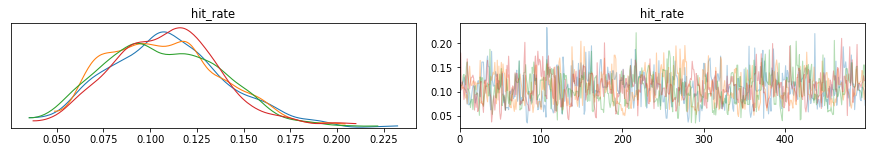

In [7]:
# display posterior on hit rate
pm.traceplot(trace);

In [8]:
# 90% credible interval for parameter
pm.summary(trace, alpha = .05)

C:\anaconda\envs\py37\lib\site-packages\pymc3\stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
hit_rate,0.10809,0.031018,0.00122,0.051788,0.16786,670.079473,0.999574


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C7E6DA2D30>],
      dtype=object)

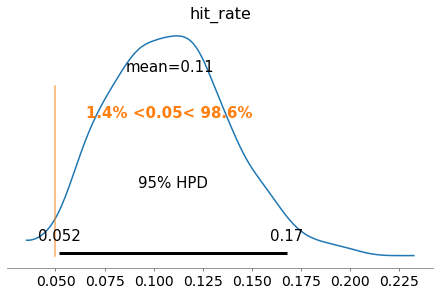

In [10]:
# probability that true hit rate is above/below 5% and credible interval
pm.plot_posterior(trace, ref_val=.05, credible_interval=0.95)